Title:


Introduction:
Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal
Clearly state the question you will try to answer with your project
Identify and describe the dataset that will be used to answer the question

Preliminary exploratory data analysis:
Demonstrate that the dataset can be read from the web into R 
Clean and wrangle your data into a tidy format
Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis. 

Links to potential datasets:

Sunshine hours for cities:
https://data.world/makeovermonday/2019w44


In [1]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
library(rvest)
library(stringr)
library(janitor)
options(repr.matrix.max.rows = 6)
source("tests.R")
source("cleanup.R")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding




ERROR: Error in library(janitor): there is no package called ‘janitor’


In [ ]:
url <- 'https://en.m.wikipedia.org/wiki/List_of_cities_by_sunshine_duration'

sunshine <- read_html(url)
print(sunshine)

In [ ]:
city <- html_text(html_nodes(sunshine, "td:nth-child(2)"))
head(city)

In [ ]:
# Replace " CE\n" with nothing.
city <- str_replace_all(string = city, pattern = "\n", replacement = "")
print(city) 

New names:
• `` -> `...1`
Rows: 10000 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): Movie Name, Genre, Certification, Director, Stars, Description
dbl (7): ...1, Year of Release, Run Time in minutes, Movie Rating, Votes, Me...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“There were 3 warnings in `filter()`.
The first warning was:
ℹ In argument: ``Year of Release` > 0 && `Movie Rating` > 0 && Gross > 0`.
Caused by warning in `` `Year of Release` > 0 && `Movie Rating` > 0 ``:
! 'length(x) = 7085 > 1' in coercion to 'logical(1)'
ℹ Run `dplyr::last_dplyr_warnings()` to see the 2 remaining warnings.”


Year of Release,ave_Gross,ave_run_time
<dbl>,<dbl>,<dbl>
1915,10000000.0,11700.000
1916,2180000.0,9780.000
1921,5450000.0,4080.000
1923,1265000.0,4170.000
1924,677500.0,5010.000
1925,2365000.0,4650.000
1926,1030000.0,4680.000
1927,4000000.0,7185.000
1928,20000.0,6840.000


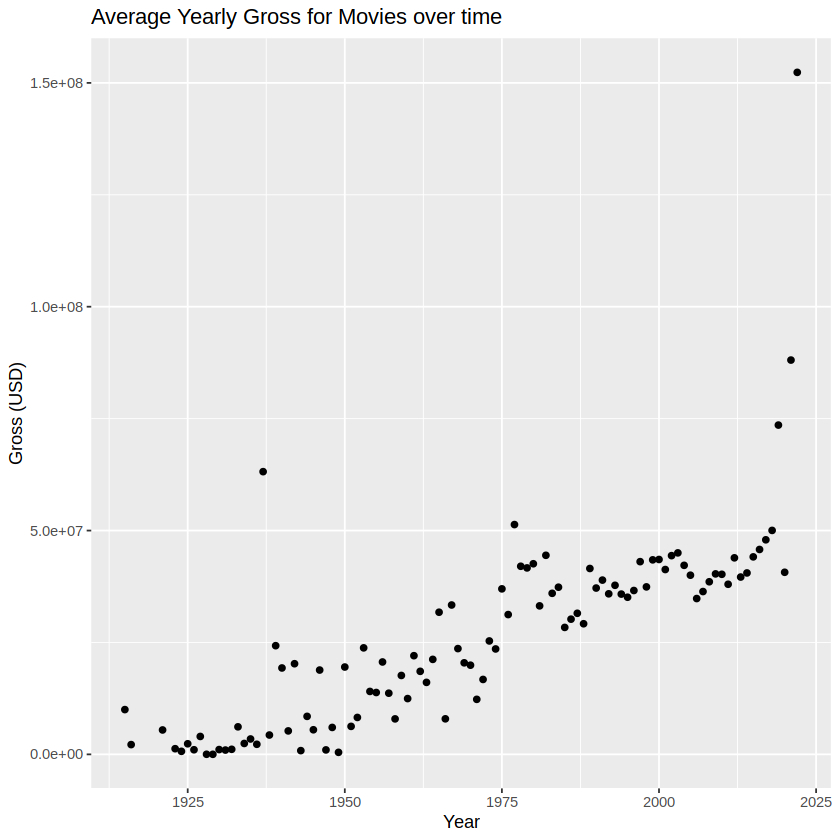

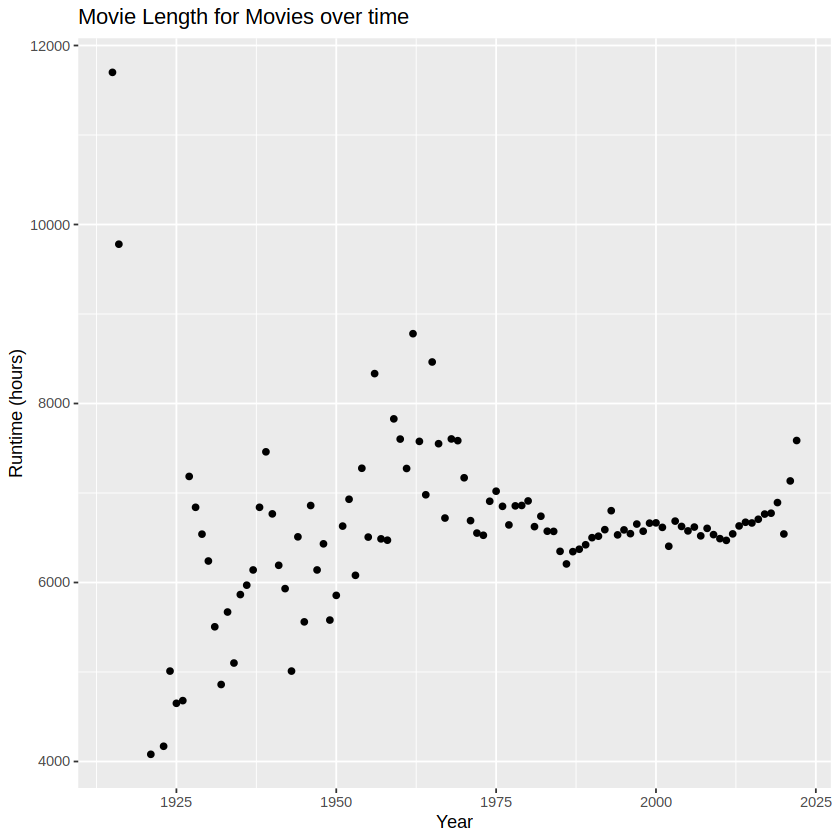

In [55]:
movies <- read_csv("data/Movies.csv") |>
    select(`Year of Release`, `Movie Rating`, Gross, `Run Time in minutes`) |>
    na.omit() |>
    filter(`Year of Release` > 0 && `Movie Rating` > 0 && Gross > 0) |>
    group_by(`Year of Release`) |>
    summarize(ave_Gross = mean(Gross), ave_run_time = mean(`Run Time in minutes`)*60) |>
    arrange(`Year of Release`)
movies
movies_plot <- movies |>
    ggplot(aes(`Year of Release`, ave_Gross)) +
        geom_point() +
        xlab("Year") +
        ylab("Gross (USD)") +
        ggtitle("Average Yearly Gross for Movies over time")
movies_plot
movies_plot_2 <- movies |>
    ggplot(aes(`Year of Release`, ave_run_time)) +
        geom_point() +
        xlab("Year") +
        ylab("Runtime (hours)") +
        ggtitle("Movie Length for Movies over time")
movies_plot_2

Methods:


Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?
Describe at least one way that you will visualize the results

Expected outcomes and significance:


What do you expect to find?
What impact could such findings have?
What future questions could this lead to?